### Problem Statement

Your goal is to build an outlier detection algorithm within 1 week of receiving this assignment
for the provided data set. The data consists of values of a variable observed every minute every
minute over a period of 1 week. Consider the training set to be the data for the first 6 days and
the test set as the last day data.  <br />
Expected output:  <br />

● Build the algorithm in python as a function where the input is the test data. The output is
a plot of the test data with potential outlier points highlighted.  <br />

● Share a public Github repository containing your code with us for review  <br />

● Your code should convey your overall approach clearly. It is a good idea to annotate your
code to make it easy to understand.   <br />

What are we looking for? <br />

● We are more interested in your approach towards solving this problem. So no worries if
the output is not perfect...though you do get bonus points for a good output.

## Plan of Action
As per the given instructions it has to be splited into train and test set and no target (label) is given So I am considering the problem as a unsupervised problem  and also there is no any additional info about data like source of the data, domain of the data, percetange of outlier that can occur for this type of data etc., 

First Level Approach : I will apply IQR, z-score and other traditional outlier detection methods to detect the outliers 

Second Level Approach : will apply some unsupervised or time series based outlier/anomaly detection methods 
isolation Forest, Local outlier factor etc.,


In [4]:
# lets import some basic python libraries for plot and file reading
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
data = pd.read_csv('assignment_data.csv')

In [6]:
data.info() # so here no null values and no need of data type casting 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ID        10080 non-null  int64
 1   variable  10080 non-null  int64
dtypes: int64(2)
memory usage: 157.6 KB


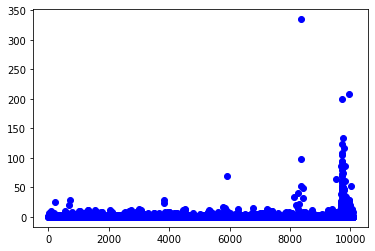

In [7]:
plt.plot(data['variable'],'bo')
plt.show()

## Box plot 

<AxesSubplot:>

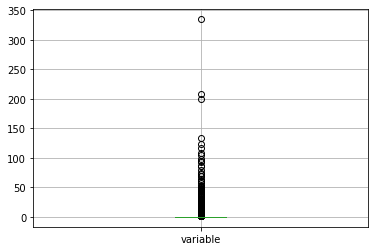

In [8]:
data[['variable']].boxplot()

# the above plot shows the mean/median is very low and there are lots of outliers 

#  Z-score for outlier detection

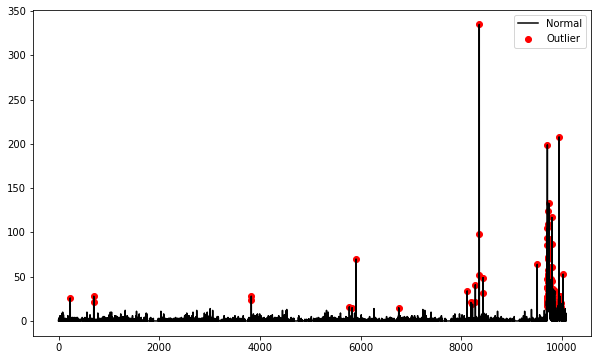

In [9]:
threshold = 2 # 2.5, 
outlier = []
data['z_score'] = (data['variable']- np.average(data['variable'])) / np.std(data['variable'])
for x in range(len(data['z_score'])):
    z = data['z_score'][x]      
    if z> threshold:
        outlier.append(1)
    else:
        outlier.append(0)

data['outlier'] =outlier

fig, ax = plt.subplots(figsize=(10,6))
a = data.loc[data['outlier'] == 1, ['variable']] # outlier
ax.plot(data.index, data['variable'], color='black', label = 'Normal')
ax.scatter(a.index,a['variable'], color='red', label = 'Outlier')
plt.legend()
plt.show()

Z score has detected the outliers but it has detected very less outliers So it is better to use unsupervised 
methods to detect proper outliers  
I am trying to use IsolationForest and Local Outlier Factor methods


## Lets Try with Isolation Forest and Local outlier factor

In [10]:
# train and test split are 6 days data points for training 1 day for testing
x_train = data.iloc[:8640]['variable']
train_ids = data.iloc[:8640]['ID']
x_test = data.iloc[8640:]['variable']
test_ids = data.iloc[8640:]['ID']

# Training and Testing with Isolation Forest and Local Outlier Factor

  ----------------- For outlier Factor 0.01 ---------------


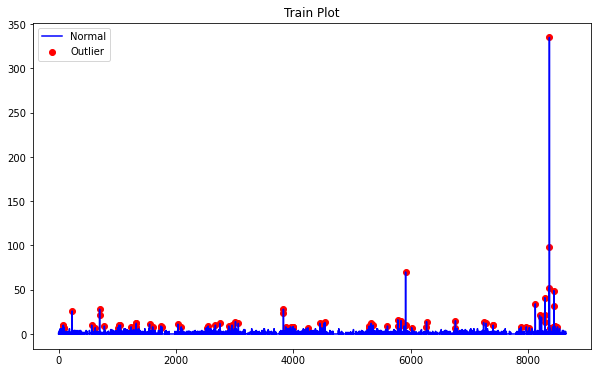

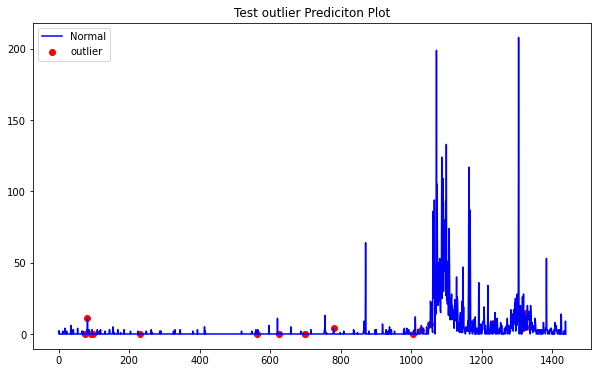

  ----------------- For outlier Factor 0.1 ---------------


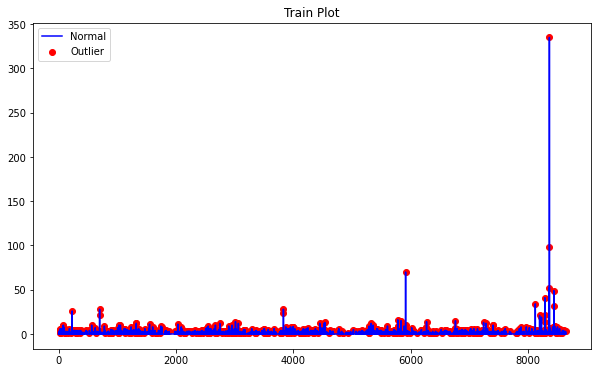

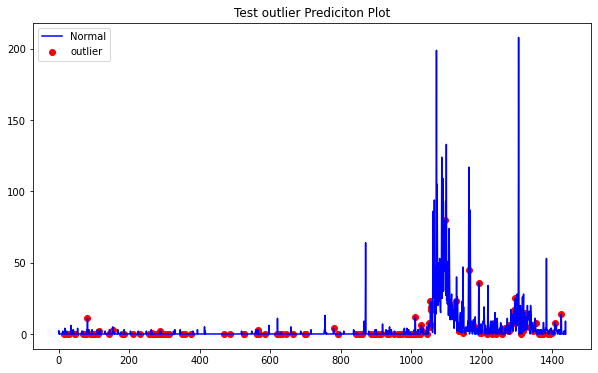

  ----------------- For outlier Factor 0.15 ---------------


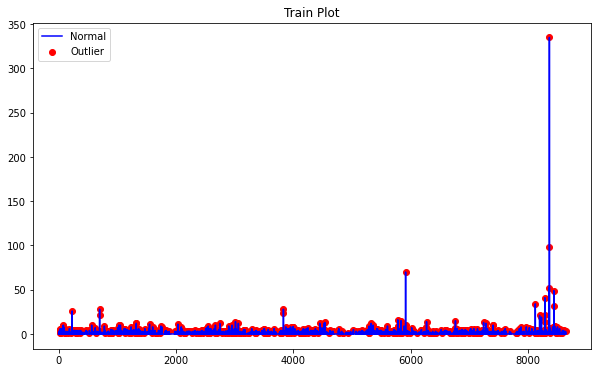

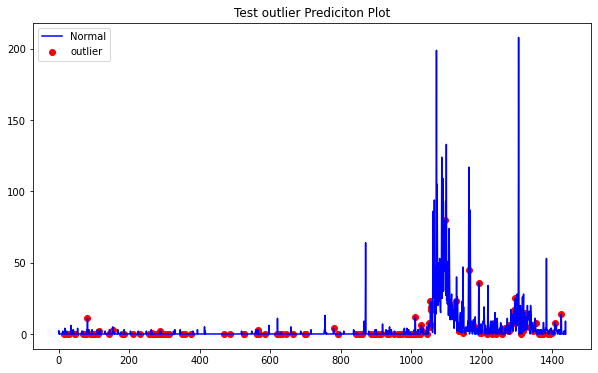

  ----------------- For outlier Factor 0.2 ---------------


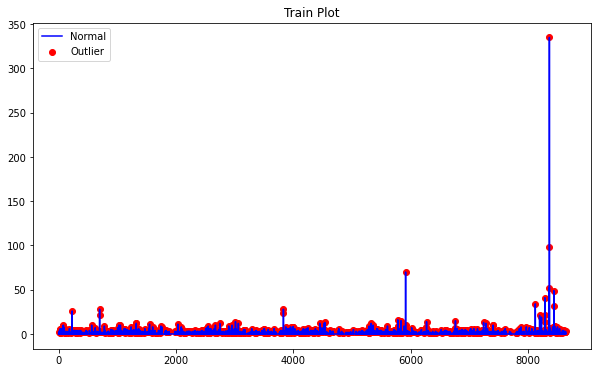

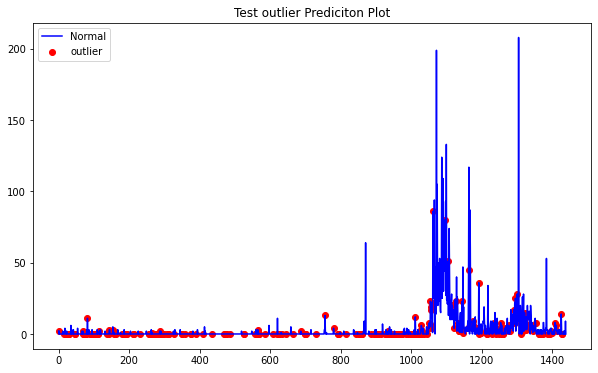

  ----------------- For outlier Factor 0.3 ---------------


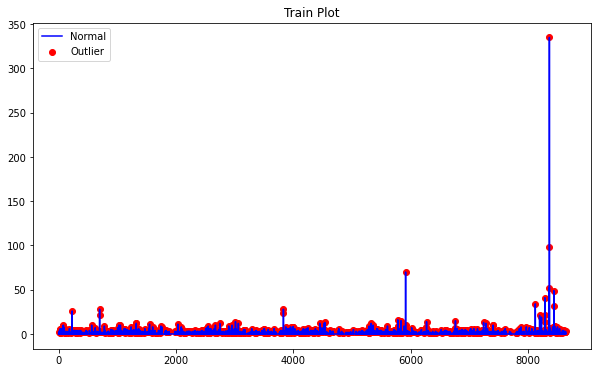

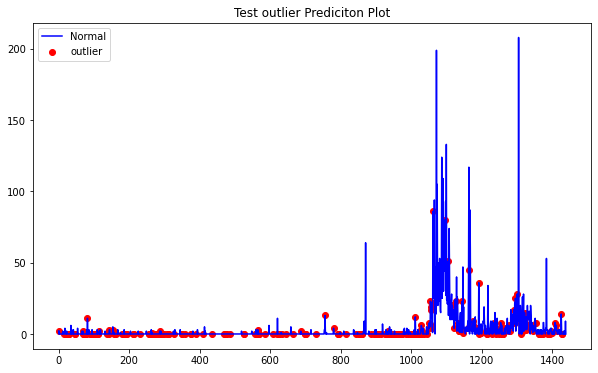

  ----------------- For outlier Factor 0.35 ---------------


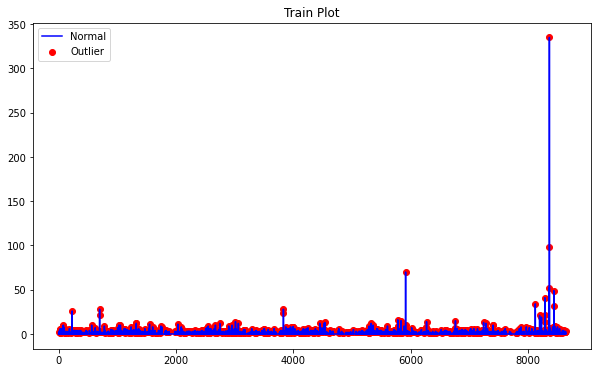

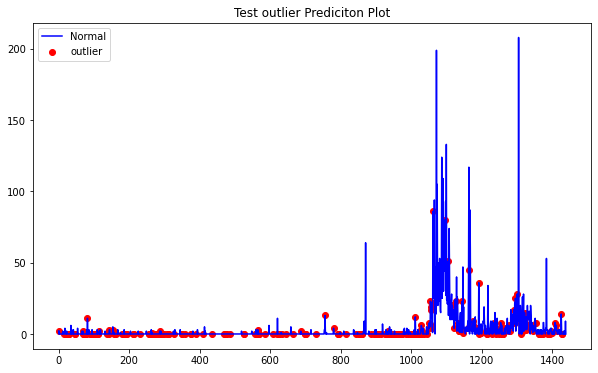

  ----------------- For outlier Factor 0.4 ---------------


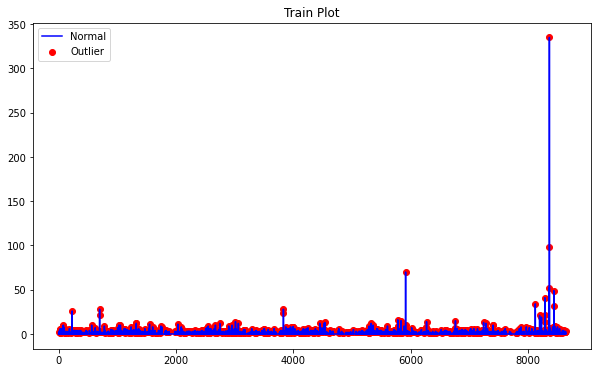

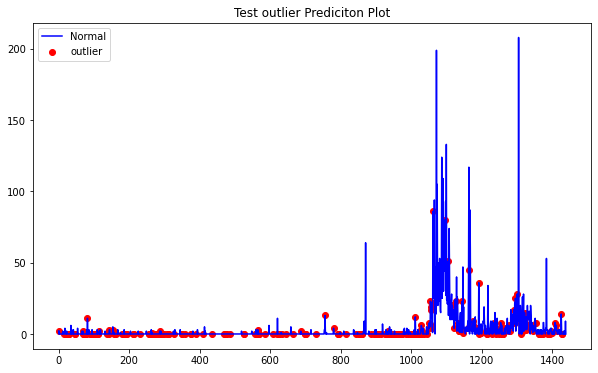

  ----------------- For outlier Factor 0.45 ---------------


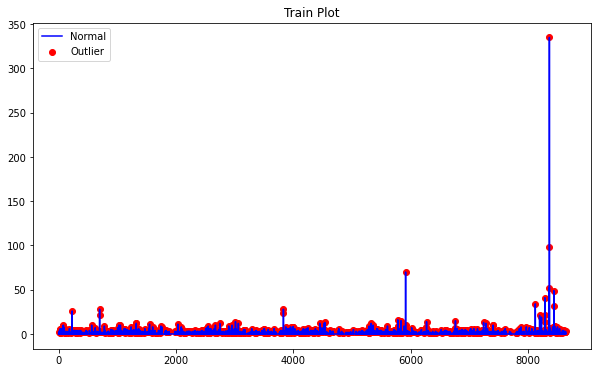

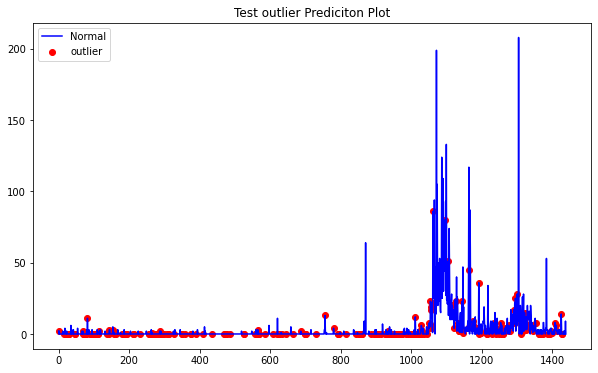

  ----------------- For outlier Factor 0.5 ---------------


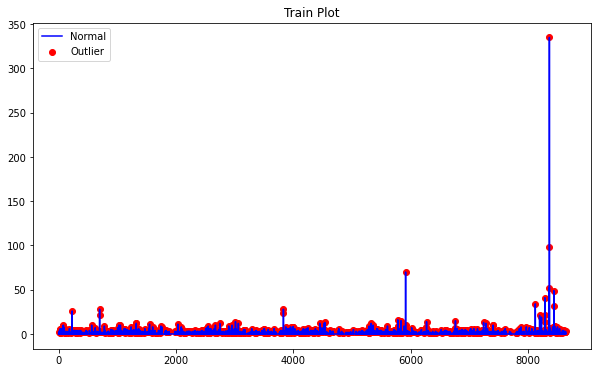

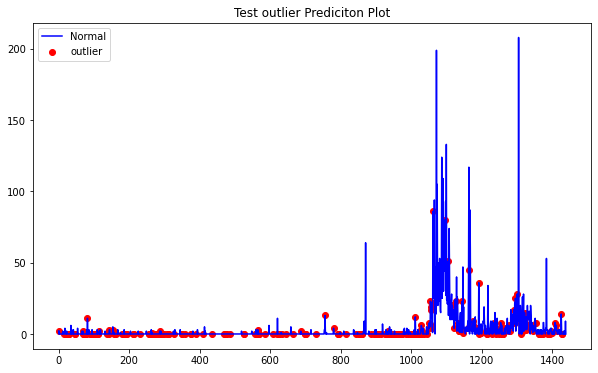

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
outliers_fractions = [0.01,0.1,0.15,0.2,0.3,0.35,0.4,0.45,0.5]
#Isolation forest need contamination factor by default it us 0.01 i am trying different values  0.1,0.2,0.3 etc
scaler = StandardScaler()
np_scaled = scaler.fit_transform(x_train.values.reshape(-1, 1))
x_train_scaled = pd.DataFrame(np_scaled)

# train isolation forest with differennt outlier factors 

for factor in outliers_fractions:
    
    print('  ----------------- For outlier Factor {a} ---------------'.format(a=factor))
    model =  IsolationForest(contamination=factor)
    model.fit(x_train_scaled)

    train_df = pd.DataFrame()
    train_df['variable'] = x_train.values
    train_df['outlier'] = model.predict(x_train_scaled)

    #  train model visualization
    fig, ax = plt.subplots(figsize=(10,6))

    a = train_df.loc[train_df['outlier'] == -1, ['variable']] #outlier

    ax.plot(train_df.index, train_df['variable'], color='blue', label = 'Normal')
    ax.scatter(a.index,a['variable'], color='red', label = 'Outlier')
    plt.legend()
    plt.title('Train Plot')
    plt.show();

    x_test_scaled = scaler.transform(x_test.values.reshape(-1, 1))
    test_df = pd.DataFrame()
    test_df['variable'] = x_test.values
    test_df['outlier'] = model.predict(x_test_scaled)

    # test visualization
    fig, ax = plt.subplots(figsize=(10,6))

    b = test_df.loc[train_df['outlier'] == -1, ['variable']] #outlier

    ax.plot(test_df.index, test_df['variable'], color='blue', label = 'Normal')
    ax.scatter(b.index,b['variable'], color='red', label = 'outlier')
    plt.legend()
    plt.title('Test outlier Prediciton Plot')
    plt.show();

/home/harish/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  """


Maximum number of times a single data point is repeated: 8330



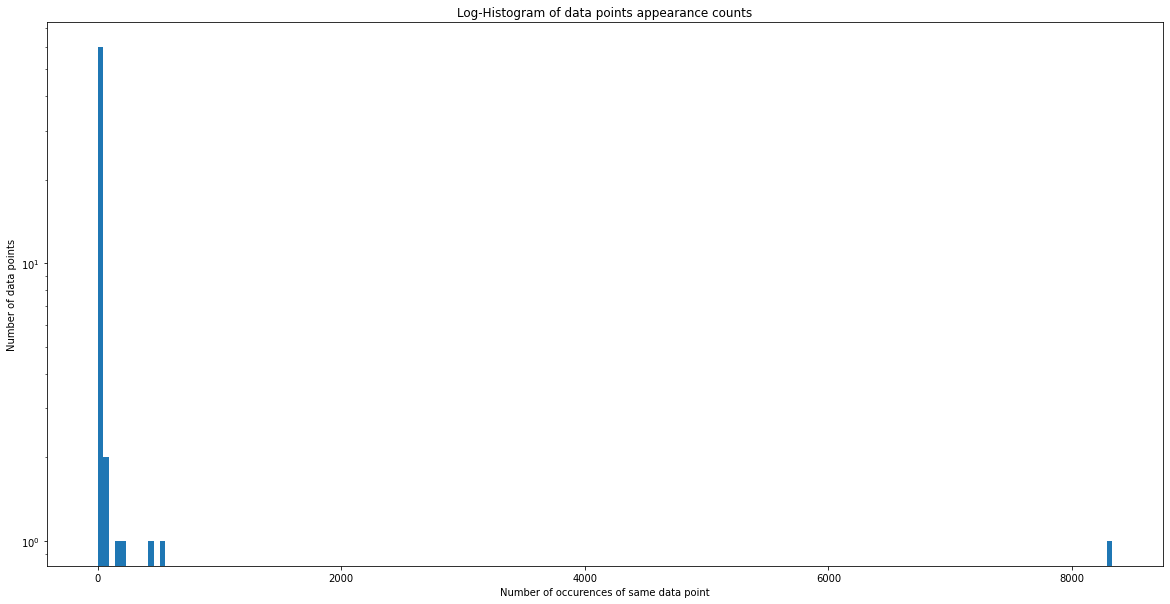

In [12]:
plt.figure(figsize=(20, 10))

plt.hist(data['variable'].value_counts(), bins=180)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of data points appearance counts')

plt.xlabel('Number of occurences of same data point')

plt.ylabel('Number of data points')

print ('Maximum number of times a single data point is repeated: {}\n'.format(max(data['variable'].value_counts()))) 

## The biggest challenge is the most of the values are nearer to zero 0 = 8330 out of  10080 
## The confusion here is whether I should ignore these zero values or not  

In [13]:
data['variable'].value_counts() 

0      8330
2       555
3       449
1       201
4       163
       ... 
38        1
46        1
98        1
58        1
335       1
Name: variable, Length: 67, dtype: int64

## Local outlier Factor for outlier detection

In [14]:
from sklearn.neighbors import LocalOutlierFactor

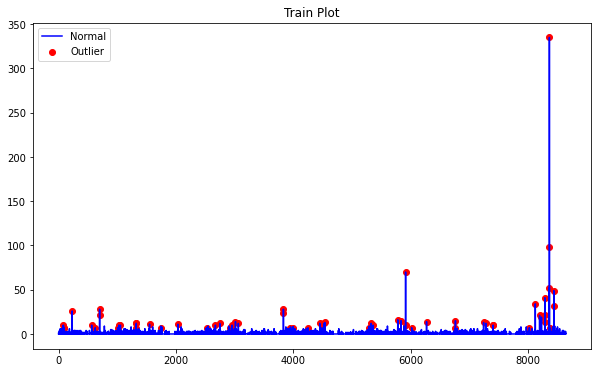

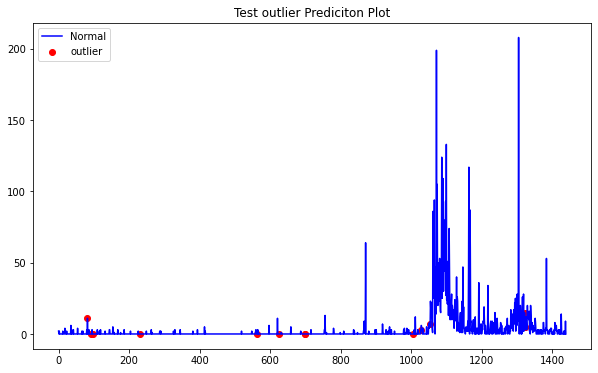

In [15]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=.25)

train_df = pd.DataFrame()
train_df['variable'] = x_train.values
train_df['outlier'] = lof.fit_predict(x_train_scaled)

# # visualization
fig, ax = plt.subplots(figsize=(10,6))

a = train_df.loc[train_df['outlier'] == -1, ['variable']] #outlier

ax.plot(train_df.index, train_df['variable'], color='blue', label = 'Normal')
ax.scatter(a.index,a['variable'], color='red', label = 'Outlier')
plt.legend()
plt.title('Train Plot')
plt.show();

x_test_scaled = scaler.fit_transform(x_test.values.reshape(-1, 1))
test_df = pd.DataFrame()
test_df['variable'] = x_test.values
test_df['outlier'] = lof.fit_predict(x_test_scaled)

# # visualization
fig, ax = plt.subplots(figsize=(10,6))

b = test_df.loc[train_df['outlier'] == -1, ['variable']] #outlier

ax.plot(test_df.index, test_df['variable'], color='blue', label = 'Normal')
ax.scatter(b.index,b['variable'], color='red', label = 'outlier')
plt.legend()
plt.title('Test outlier Prediciton Plot')
plt.show();


## the results of Isolation Forest are better than all other methods so  i am considering Isoation Forest as my final method

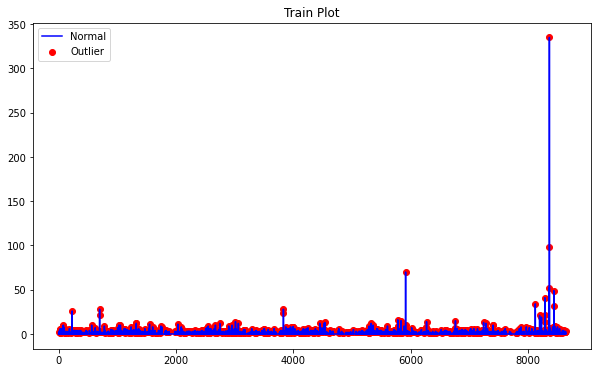

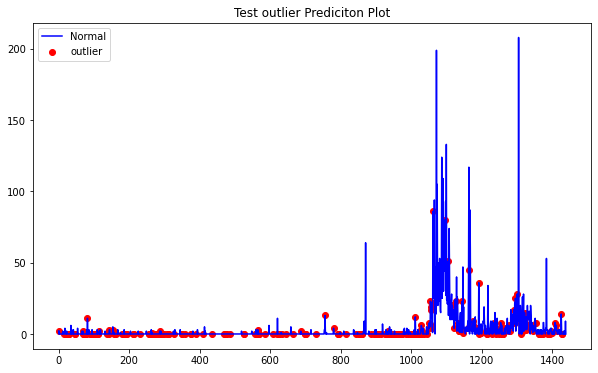

In [16]:
# since overall the testing results are not good so i am considering 0.2 as default contamination factor 
# but it is good to try other values also

scaler = StandardScaler()
np_scaled = scaler.fit_transform(x_train.values.reshape(-1, 1))
x_train_scaled = pd.DataFrame(np_scaled)

model =  IsolationForest(contamination=0.2)
model.fit(x_train_scaled)

train_df = pd.DataFrame()
train_df['variable'] = x_train.values
train_df['outlier'] = model.predict(x_train_scaled)

# # visualization
fig, ax = plt.subplots(figsize=(10,6))

a = train_df.loc[train_df['outlier'] == -1, ['variable']] #outlier

ax.plot(train_df.index, train_df['variable'], color='blue', label = 'Normal')
ax.scatter(a.index,a['variable'], color='red', label = 'Outlier')
plt.legend()
plt.title('Train Plot')
plt.show();

x_test_scaled = scaler.transform(x_test.values.reshape(-1, 1))
test_df = pd.DataFrame()
test_df['variable'] = x_test.values
test_df['outlier'] = model.predict(x_test_scaled)

# # visualization
fig, ax = plt.subplots(figsize=(10,6))

b = test_df.loc[train_df['outlier'] == -1, ['variable']] #outlier

ax.plot(test_df.index, test_df['variable'], color='blue', label = 'Normal')
ax.scatter(b.index,b['variable'], color='red', label = 'outlier')
plt.legend()
plt.title('Test outlier Prediciton Plot')
plt.show();

In [17]:
# dumping the trained model so later it can be used for testing purposes
import pickle 

filename = 'IForestOutlierDetection.sav'
pickle.dump(model, open(filename, 'wb'))
pickle.dump(scaler,open('scaler.sav','wb'))

## Function for Prediction

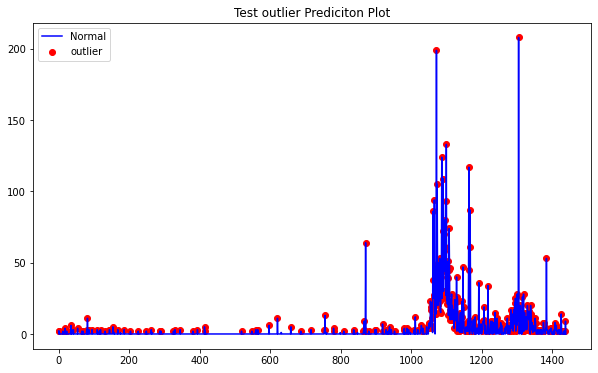

In [18]:
import pickle 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('assignment_data.csv')

x_train = data.iloc[:8640]['variable']
train_ids = data.iloc[:8640]['ID']
x_test = data.iloc[8640:]['variable']
test_ids = data.iloc[8640:]['ID']

model = pickle.load(open('IForestOutlierDetection.sav', 'rb'))
scaler = pickle.load(open('scaler.sav','rb'))

def finalOutlierDetection(dataArray):
    
    df = pd.DataFrame(data=dataArray,columns=['variable'])
    dataScaled = scaler.fit_transform(df.values.reshape(-1, 1))
    df['outlier'] = model.predict(dataScaled)
    
    fig, ax = plt.subplots(figsize=(10,6))
    b = df.loc[df['outlier'] == -1, ['variable']] #outlier
    ax.plot(df.index, df['variable'], color='blue', label = 'Normal')
    ax.scatter(b.index,b['variable'], color='red', label = 'outlier')
    plt.legend()
    plt.title('Test outlier Prediciton Plot')
    plt.show();
    
finalOutlierDetection(x_test.values)